# Personal Information

Name: **Reema Abdullah Aldanish**.




 <b><font size="8" color='violet'>
Part 1: Text Representation
</font></b>

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from IPython.display import display
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import FastText

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def load_dataset(file_path, delimiter='\t', nrows=2500):
    try:
        df = pd.read_csv(file_path, delimiter=delimiter, on_bad_lines='skip', nrows=nrows)
        print(f"Data loaded successfully from {file_path}, shape: {df.shape}")
        return df
    except Exception as e:
        print(f"An error occurred while loading data from {file_path}: {e}")
        return None
file_paths = [
    '/content/train_Arabic_tweets_positive_20190413.tsv',
    '/content/train_Arabic_tweets_negative_20190413.tsv',
    '/content/test_Arabic_tweets_positive_20190413.tsv',
    '/content/test_Arabic_tweets_negative_20190413.tsv'
]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
delimiter = '\t'
datasets = [load_dataset(path, delimiter, nrows=2500) for path in file_paths]
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
print(f"\nTrain Arabic Tweets Positive shape: {train_arabic_tweets_positive.shape}")
print(f"Train Arabic Tweets Negative shape: {train_arabic_tweets_negative.shape}")
print(f"Test Arabic Tweets Positive shape: {test_arabic_tweets_positive.shape}")
print(f"Test Arabic Tweets Negative shape: {test_arabic_tweets_negative.shape}")

Data loaded successfully from /content/train_Arabic_tweets_positive_20190413.tsv, shape: (2500, 2)
Data loaded successfully from /content/train_Arabic_tweets_negative_20190413.tsv, shape: (2500, 2)
Data loaded successfully from /content/test_Arabic_tweets_positive_20190413.tsv, shape: (2500, 2)
Data loaded successfully from /content/test_Arabic_tweets_negative_20190413.tsv, shape: (2500, 2)

Train Arabic Tweets Positive shape: (2500, 2)
Train Arabic Tweets Negative shape: (2500, 2)
Test Arabic Tweets Positive shape: (2500, 2)
Test Arabic Tweets Negative shape: (2500, 2)


In [ ]:
# Display column names using df.columns.tolist() >>
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    ('Train Arabic Tweets Positive', train_arabic_tweets_positive),
    ('Train Arabic Tweets Negative', train_arabic_tweets_negative),
    ('Test Arabic Tweets Positive', test_arabic_tweets_positive),
    ('Test Arabic Tweets Negative', test_arabic_tweets_negative)
]
for name, df in dataset_names:
    if df is not None:
        print(f"\n{name} column names:")
        print(df.columns.tolist())
    else:
        print(f"\n{name} failed to load.")


Train Arabic Tweets Positive column names:
['pos', 'نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…']

Train Arabic Tweets Negative column names:
['neg', 'اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭']

Test Arabic Tweets Positive column names:
['pos', '#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…']

Test Arabic Tweets Negative column names:
['neg', 'حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭']


In [ ]:
# Display shapes and first 10 rows of each dataset >>
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
print(f"\nTrain Arabic Tweets Positive shape: {train_arabic_tweets_positive.shape}")
display(train_arabic_tweets_positive.head(10))
print(f"\nTrain Arabic Tweets Negative shape: {train_arabic_tweets_negative.shape}")
display(train_arabic_tweets_negative.head(10))
print(f"\nTest Arabic Tweets Positive shape: {test_arabic_tweets_positive.shape}")
display(test_arabic_tweets_positive.head(10))
print(f"\nTest Arabic Tweets Negative shape: {test_arabic_tweets_negative.shape}")
display(test_arabic_tweets_negative.head(10))


Train Arabic Tweets Positive shape: (2500, 2)


,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…
0,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
1,pos,من الخير نفسه 💛
2,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
3,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
4,pos,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...
5,pos,احبك انت وياه واموري من سعه 🎶
6,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
7,pos,وينهم الي يرقصوا مع زخات المطر 💃 خلونا نشوفكم ...
8,pos,اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...
9,pos,نمش ننوم ما دا ديل ولادنا 💚



Train Arabic Tweets Negative shape: (2500, 2)


,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
5,neg,يبدو ان دجلة اعتادت على التهام اجساد ابنائها م...
6,neg,جالس أذاكر 😣
7,neg,يكفي استخفاف بالعقل العربي هل حقا الأمن والمخا...
8,neg,ياليلل ترا اكلج كثير مشي 😭
9,neg,لو بيدي أرجع ساعتي وين أرجع؟ إليا صدفه؟ والله ...



Test Arabic Tweets Positive shape: (2500, 2)


,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…
0,pos,صباحك خيرات ومسرات 🌸
1,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
2,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
3,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
4,pos,اجيال القووه والصمود والتحدي اجيال المستقبل وا...
5,pos,البنت اذا شافت امها معصبة تقوم ترتب البيت لا ا...
6,pos,جدا الصراحه بس المغرب قدها 💪
7,pos,صباح الياسمين 🍃
8,pos,لسنا مجبرين على تبرير المواقف لمن يسيء الظن بن...
9,pos,كل اللي اتمناه ان على كثر ما اسهر واتعب يرجع ك...



Test Arabic Tweets Negative shape: (2500, 2)


,neg,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...
5,neg,اترك لكم التعليق 💔
6,neg,والله ي عم جعان نوم 😴 😂 بس مش عارف وربناا 😂 😂
7,neg,#ايش_علمتك_الايام لأنك لم تتخابث يوما لم تنجح ...
8,neg,تفائلو!! يبنات مضحكين شكلهم كانو عايشين بهم و ...
9,neg,هيك كتير يا عالم شوي شوي علي طيب ، استنوني طيب 💔


# Tokenization:

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
dataset_vars = [
    train_arabic_tweets_positive,
    train_arabic_tweets_negative,
    test_arabic_tweets_positive,
    test_arabic_tweets_negative
]
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    return text
def tokenize_text(text):
    return word_tokenize(text)
def clean_and_tokenize(df, text_column):
    df['tokens'] = df[text_column].apply(lambda x: tokenize_text(preprocess_text(x)))
    return df
for i, (df, name) in enumerate(zip(dataset_vars, dataset_names)):
    if df is not None:
        text_column = df.columns[1]
        subset_df = df.head(2500)
        subset_df = clean_and_tokenize(subset_df, text_column)
        print(f"\nDataset {i+1}: {name} - Shape of the first 2500 rows: {subset_df.shape}")
        display(subset_df[[text_column, 'tokens']].head())
    else:
        print(f"\nDataset {i+1}: {name} failed to load.")


Dataset 1: Train Arabic Tweets Positive - Shape of the first 2500 rows: (2500, 3)


<ipython-input-5-cd34f39aa628>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df[text_column].apply(lambda x: tokenize_text(preprocess_text(x)))


,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…,tokens
0,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,"[وفي, النهاية, لن, يبقى, معك, آحدإلا, من, رأى,..."
1,من الخير نفسه 💛,"[من, الخير, نفسه]"
2,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,"[زلزل_الملعب_نصرنا_بيلعب, كن, عالي, الهمه, ولا..."
3,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,"[الشيء, الوحيد, الذي, وصلوا, فيه, للعالمية, هو..."
4,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...,"[الاتحاد_النصر, لاتحسبونا, نسينا, يالطواقي, ول..."



Dataset 2: Train Arabic Tweets Negative - Shape of the first 2500 rows: (2500, 3)


<ipython-input-5-cd34f39aa628>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df[text_column].apply(lambda x: tokenize_text(preprocess_text(x)))


,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭,tokens
0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,"[توقعت, اذا, جات, داريا, بشوفهم, كاملين, بس, ل..."
1,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,"[الاهلي_الهلال, اكتب, توقعك, لنتيجة, لقاء, اله..."
2,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,"[نعمة, المضادات, الحيوية, تضع, قطرةمضاد, بنسلي..."
3,الدودو جايه تكمل علي 💔,"[الدودو, جايه, تكمل, علي]"
4,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...,"[أحببته, حتى, أقنعنى, إن, ما, فات, من, العمر, ..."



Dataset 3: Test Arabic Tweets Positive - Shape of the first 2500 rows: (2500, 3)


<ipython-input-5-cd34f39aa628>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df[text_column].apply(lambda x: tokenize_text(preprocess_text(x)))


,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…,tokens
0,صباحك خيرات ومسرات 🌸,"[صباحك, خيرات, ومسرات]"
1,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...,"[تأمل, قال, الله, ﷻ, _بواد, غير, ذي, زرع, _, و..."
2,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...,"[يا, جدعان, الرجاله, اللي, فوق, ال, دول, خطر, ..."
3,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...,"[رساله, صباحيه, اللهم, اسألك, التوفيق, في, جمي..."
4,اجيال القووه والصمود والتحدي اجيال المستقبل وا...,"[اجيال, القووه, والصمود, والتحدي, اجيال, المست..."



Dataset 4: Test Arabic Tweets Negative - Shape of the first 2500 rows: (2500, 3)


<ipython-input-5-cd34f39aa628>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df[text_column].apply(lambda x: tokenize_text(preprocess_text(x)))


,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭,tokens
0,واحد تبع النظام السوري يقول أن المخابرات السور...,"[واحد, تبع, النظام, السوري, يقول, أن, المخابرا..."
1,الى متى التعامل السئ للخادمات وعدم احترامهم وك...,"[الى, متى, التعامل, السئ, للخادمات, وعدم, احتر..."
2,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي,"[رايح, جاي, ي, طحلبي, الهلال_الاهلي]"
3,تتمغط ومعها سداع 😫,"[تتمغط, ومعها, سداع]"
4,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...,"[اذا, ما, كان, ألطف, كوبل, مر, عليكم, حظ, جاني..."



The code loads datasets of positive and negative Arabic tweets for training and testing a model. It converts the text into tokens using functions for cleaning and tokenizing the text. Then, it displays the shape (number of rows and columns) of the first 2500 rows of each dataset along with the tokenized text.

# Removal of Punctuation:

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
dataset_vars = [
    train_arabic_tweets_positive,
    train_arabic_tweets_negative,
    test_arabic_tweets_positive,
    test_arabic_tweets_negative
]
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
for i, (df, name) in enumerate(zip(dataset_vars, dataset_names)):
    if df is not None:
        text_column = df.columns[1]
        print(f"\nDataset {i+1} ({name}): Shape of the first 2500 rows: {df.shape}")
        df['before'] = df[text_column]
        df['after'] = df[text_column].apply(remove_punctuation)
        display(df[['before', 'after']].head(10))
    else:
        print(f"\nDataset {i+1} ({name}): Failed to load.")
train_arabic_tweets_positive = dataset_vars[0]
train_arabic_tweets_negative = dataset_vars[1]
test_arabic_tweets_positive = dataset_vars[2]
test_arabic_tweets_negative = dataset_vars[3]


Dataset 1 (Train Arabic Tweets Positive): Shape of the first 2500 rows: (2500, 2)


,before,after
0,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,وفي النهاية لن يبقى معك آحدإلا من رأى الجمال ف...
1,من الخير نفسه 💛,من الخير نفسه
2,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترضى...
3,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,الشيء الوحيد الذي وصلوا فيه للعالمية هو المسي...
4,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...,الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبيك...
5,احبك انت وياه واموري من سعه 🎶,احبك انت وياه واموري من سعه
6,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...,تأمل قال الله ﷻ _بواد غير ذي زرع _ ومع ذلك...
7,وينهم الي يرقصوا مع زخات المطر 💃 خلونا نشوفكم ...,وينهم الي يرقصوا مع زخات المطر خلونا نشوفكم ل...
8,اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...,اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...
9,نمش ننوم ما دا ديل ولادنا 💚,نمش ننوم ما دا ديل ولادنا



Dataset 2 (Train Arabic Tweets Negative): Shape of the first 2500 rows: (2500, 2)


,before,after
0,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال وا...
2,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,نعمة المضادات الحيوية تضع قطرةمضاد بنسلين على...
3,الدودو جايه تكمل علي 💔,الدودو جايه تكمل علي
4,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
5,يبدو ان دجلة اعتادت على التهام اجساد ابنائها م...,يبدو ان دجلة اعتادت على التهام اجساد ابنائها م...
6,جالس أذاكر 😣,جالس أذاكر
7,يكفي استخفاف بالعقل العربي هل حقا الأمن والمخا...,يكفي استخفاف بالعقل العربي هل حقا الأمن والمخا...
8,ياليلل ترا اكلج كثير مشي 😭,ياليلل ترا اكلج كثير مشي
9,لو بيدي أرجع ساعتي وين أرجع؟ إليا صدفه؟ والله ...,لو بيدي أرجع ساعتي وين أرجع إليا صدفه والله أب...



Dataset 3 (Test Arabic Tweets Positive): Shape of the first 2500 rows: (2500, 2)


,before,after
0,صباحك خيرات ومسرات 🌸,صباحك خيرات ومسرات
1,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...,تأمل قال الله ﷻ _بواد غير ذي زرع _ ومع ذلك...
2,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...,يا جدعان الرجاله اللي فوق ال دول خطر ع تويتر ...
3,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...,رساله صباحيه اللهم اسألك التوفيق في جميع امو...
4,اجيال القووه والصمود والتحدي اجيال المستقبل وا...,اجيال القووه والصمود والتحدي اجيال المستقبل وا...
5,البنت اذا شافت امها معصبة تقوم ترتب البيت لا ا...,البنت اذا شافت امها معصبة تقوم ترتب البيت لا ا...
6,جدا الصراحه بس المغرب قدها 💪,جدا الصراحه بس المغرب قدها
7,صباح الياسمين 🍃,صباح الياسمين
8,لسنا مجبرين على تبرير المواقف لمن يسيء الظن بن...,لسنا مجبرين على تبرير المواقف لمن يسيء الظن بن...
9,كل اللي اتمناه ان على كثر ما اسهر واتعب يرجع ك...,كل اللي اتمناه ان على كثر ما اسهر واتعب يرجع ك...



Dataset 4 (Test Arabic Tweets Negative): Shape of the first 2500 rows: (2500, 2)


,before,after
0,واحد تبع النظام السوري يقول أن المخابرات السور...,واحد تبع النظام السوري يقول أن المخابرات السور...
1,الى متى التعامل السئ للخادمات وعدم احترامهم وك...,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي,رايح جاي ي طحلبي الهلال_الاهلي
3,تتمغط ومعها سداع 😫,تتمغط ومعها سداع
4,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...,اذا ما كان ألطف كوبل مر عليكم حظ جانيت بسماء ...
5,اترك لكم التعليق 💔,اترك لكم التعليق
6,والله ي عم جعان نوم 😴 😂 بس مش عارف وربناا 😂 😂,والله ي عم جعان نوم بس مش عارف وربناا
7,#ايش_علمتك_الايام لأنك لم تتخابث يوما لم تنجح ...,ايش_علمتك_الايام لأنك لم تتخابث يوما لم تنجح ع...
8,تفائلو!! يبنات مضحكين شكلهم كانو عايشين بهم و ...,تفائلو يبنات مضحكين شكلهم كانو عايشين بهم و حز...
9,هيك كتير يا عالم شوي شوي علي طيب ، استنوني طيب 💔,هيك كتير يا عالم شوي شوي علي طيب استنوني طيب



The code displays the original texts and the cleaned texts after removing special characters, numbers, and punctuation marks, and converting them to lowercase. along with the texts before and after cleaning, illustrating the changes made to prepare the texts for further analysis.

# Data representation:

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
dataset_vars = [
    train_arabic_tweets_positive,
    train_arabic_tweets_negative,
    test_arabic_tweets_positive,
    test_arabic_tweets_negative
]
def generate_tfidf(df, text_column):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df[text_column])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    return tfidf_df
for i, (df, name) in enumerate(zip(dataset_vars, dataset_names)):
    if df is not None:
        text_column = df.columns[1]
        tfidf_df = generate_tfidf(df, text_column)
        print(f"\nTF-IDF representation for {name} (first 5 rows):")
        display(tfidf_df.head(5))
    else:
        print(f"\nDataset {i+1} ({name}): Failed to load.")


TF-IDF representation for Train Arabic Tweets Positive (first 5 rows):


,00,00ص,100,13,15,15h30,19,190408انستقرام,25,40,...,ﻳﺒﺘﻠﻴﻪ,ﻳﺠﺪ,ﻳﺤﺒﺲ,ﻳﺨﻄﺮ,ﻳﺴﺘﻄﻴﻊ,ﻳﺸﻜﻮ,ﻳﻔﻬﻤﻪ,ﻳﻜﻮﻥ,ﻷن,ﻻحظ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



TF-IDF representation for Train Arabic Tweets Negative (first 5 rows):


,00,04,10,11,12,17,18,2019م,24,250,...,ﻭﺍﻫﻞ,ﻭﻋﺪﻙ,ﻭﻣﻦ,ﻳﺤﺒﻚ,ﻳﺮﺧﺼﻚ,ﻳﺮﻓﻊ,ﻳﺴﺘﺤﻖ,ﻳﺸﻌﺮ,ﻳﻌﺸﻘﻮﻥ,ﻳﻤگن
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



TF-IDF representation for Test Arabic Tweets Positive (first 5 rows):


,00,00am,00ص,04,08,1440ه,19,1951,1953,1972,...,ﻣﺜﻞ,ﻣﻦ,ﻧﺼﻴﺒﺎ,ﻧﻮﺭ,ﻭﺃﻧﺖ,ﻭﻓﻲ,ﻭﻳﺴﺮ,ﻳﺤﺒﺲ,ﻻترد,ﻻتنسونها
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



TF-IDF representation for Test Arabic Tweets Negative (first 5 rows):


,08,11,12,1440,15,16,17,18,2019,24,...,ﻣﺮﺍﺣﻞ,ﻣﻦ,ﻣﻨﺂ,ﻣﻨﻬﻢ,ﻧﻜﻮﻥ,ﻫﻲ,ﻳﺼﺪﺭ,ﻳﻘﺘﺮﺏ,ﻳﻘﺮﺃﺅﻧﺎ,ﻳﻤگن
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



The code loads datasets of Arabic tweets and converts the texts into TF-IDF representations. It displays the first 5 rows of the TF-IDF matrices for each dataset, showing the term frequency-inverse document frequency values for each word in the tweets. This helps identify the most important words in each tweet.

# Print the most similar words to  
ا ﻣ ﺘ ﺤ ﺎ ن
 ,
 ا ﻷ ھ ﻠ ﻲ
 ،
 ا ﻻ ﺗ ﺤ ﺎ د

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
datasets = [
    train_arabic_tweets_positive,
    train_arabic_tweets_negative,
    test_arabic_tweets_positive,
    test_arabic_tweets_negative
]
def tokenize_text(text):
    return word_tokenize(text)

for i, df in enumerate(datasets):
    if df is not None:
        text_column = df.columns[1]
        df['tokens'] = df[text_column].apply(tokenize_text)
        datasets[i] = df
all_tokens = []
for df in datasets:
    if df is not None:
        all_tokens.extend(df['tokens'].tolist())
model = FastText(vector_size=300, window=5, min_count=1, sg=1, workers=4, min_n=2, max_n=5)
model.build_vocab(all_tokens)
model.train(all_tokens, total_examples=len(all_tokens), epochs=30)
model.save("fasttext_model")
fasttext_model = FastText.load("fasttext_model")
terms = ["امتحان", "الأهلي", "الاتحاد"]
def print_most_similar_words(model, terms):
    for term in terms:
        if term in model.wv:
            similar_words = model.wv.most_similar(term, topn=10)
            print(f"model.wv.most_similar(\"{term}\")")
            print("[")
            for word, similarity in similar_words:
                print(f"('{word}', '{similarity:.16f}'),")
            print("]")
        else:
            print(f"Term '{term}' not found in the FastText model vocabulary.")
print_most_similar_words(fasttext_model, terms)

model.wv.most_similar("امتحان")
[
('الامتحان', '0.8626484870910645'),
('امتحن', '0.8569846749305725'),
('للامتحان', '0.8355089426040649'),
('امتحانات', '0.8095250129699707'),
('امتحاني', '0.8057311177253723'),
('الامتحانات…', '0.7813485860824585'),
('اغصان', '0.7732345461845398'),
('امان', '0.7692655920982361'),
('اردوغان', '0.7550263404846191'),
('ايران', '0.7548949122428894'),
]
model.wv.most_similar("الأهلي")
[
('الأهالي', '0.8496037125587463'),
('الأهل', '0.8237919211387634'),
('الأصلي', '0.8208019137382507'),
('الأهلأويه', '0.8030516505241394'),
('الأهلى', '0.7972531318664551'),
('الأهداف', '0.7887023091316223'),
('الأقصي', '0.7701155543327332'),
('الأوسط', '0.7595457434654236'),
('الأوقاف', '0.7442679405212402'),
('الأساسي', '0.7386431097984314'),
]
model.wv.most_similar("الاتحاد")
[
('الاتحااد', '0.9807891845703125'),
('/الاتحاد', '0.9685767889022827'),
('الاتحادي', '0.9350141882896423'),
('لاتحاد', '0.9235058426856995'),
('اتحاد', '0.8979099392890930'),
('وللاتحاد', '0.89002567


The code loads Arabic tweet datasets, tokenizes the texts, and aggregates these tokens to train a FastText model. After training, the model is saved and loaded, then it prints the most similar words for specified terms. This helps in identifying contextually similar words in the tweet texts.

# Plot and visualize the embedding of the following words.
 " ا ﻻ ﺧ ﺘ ﺒ ﺎ ر ﺻ ﻌ ﺐ ، ا ﻻ ﻣ ﺘ ﺤ ﺎ ن ﻛ ﺎ ن ﺳ ﮭ ﻞ ، ا ﻟ ﻤ ﺒ ﺎ ر ه ﺻ ﻌ ﺒ ﮫ ، ا ﻻ ھ ﻠ ﻲ ﻓ ﺎ ز و ا ﻻ ﺗ ﺤ ﺎ د ﺧ ﺴ ﺮ "  


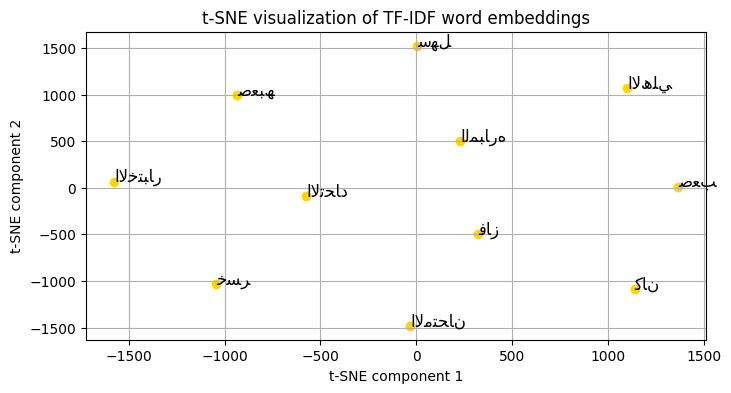

In [ ]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    return text
sentences = [
    "اﻻﺧﺘﺒﺎر ﺻﻌﺐ",
    "اﻻﻣﺘﺤﺎن ﻛﺎن ﺳﮭﻞ",
    "اﻟﻤﺒﺎره ﺻﻌﺒﮫ",
    "اﻻھﻠﻲ ﻓﺎز",
    "اﻻﺗﺤﺎد ﺧﺴﺮ"
]
cleaned_sentences = [preprocess_text(sentence) for sentence in sentences]
tokenized_sentences = [word_tokenize(sentence) for sentence in cleaned_sentences]
all_words = [word for sentence in tokenized_sentences for word in sentence]
vectorizer = TfidfVectorizer()
word_tfidf_matrix = vectorizer.fit_transform(all_words)
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_results = tsne.fit_transform(word_tfidf_matrix.toarray())
plt.figure(figsize=(8, 4))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], color='gold')
for i, word in enumerate(all_words):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=12)
plt.title('t-SNE visualization of TF-IDF word embeddings')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.grid(True)
plt.show()

The image shows the distribution of words based on their TF-IDF representation using t-SNE for dimensionality reduction. The yellow points represent words, and their distribution in the 2D space illustrates the similarity between them based on their numerical representation. This helps in understanding the relationships between words in the studied texts.



---





 <b><font size="8" color='violet'>
Part 2: Arabic Sentiment analysis using Neural Network and LSTM  
</font></b>


## Task 1


In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
train_df = pd.concat([train_arabic_tweets_positive, train_arabic_tweets_negative])
test_df = pd.concat([test_arabic_tweets_positive, test_arabic_tweets_negative])
train_df['label'] = [1] * len(train_arabic_tweets_positive) + [0] * len(train_arabic_tweets_negative)
test_df['label'] = [1] * len(test_arabic_tweets_positive) + [0] * len(test_arabic_tweets_negative)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df.iloc[:, 1].astype(str))
train_sequences = tokenizer.texts_to_sequences(train_df.iloc[:, 1].astype(str))
test_sequences = tokenizer.texts_to_sequences(test_df.iloc[:, 1].astype(str))
max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)
y_train = train_df['label'].values
y_test = test_df['label'].values
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(4, activation='relu'))  # Hidden layer with 4 neurons <<
model.add(Dense(2, activation='softmax'))  # Output layer with 2 neurons <<
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

X_train shape: (5000, 100)
X_test shape: (5000, 100)
y_train shape: (5000,)
y_test shape: (5000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 4)                 51204     
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 691214 (2.64 MB)
Trainable params: 691214 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The code builds a neural network to classify Arabic tweets. It starts with an embedding layer to convert words into vectors. Then, a flatten layer converts these vectors into a flat shape. Next, there is a hidden layer with four neurons using the 'relu' activation function. Finally, an output layer with two neurons determines if the tweet is positive or negative using 'softmax'. The model is compiled with the 'sparse_categorical_crossentropy' loss function and the 'adam' optimizer.

## Task 2

Train an ANN model using the wod2vec model:

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
train_df = pd.concat([train_arabic_tweets_positive, train_arabic_tweets_negative])
test_df = pd.concat([test_arabic_tweets_positive, test_arabic_tweets_negative])
train_df['label'] = [1] * len(train_arabic_tweets_positive) + [0] * len(train_arabic_tweets_negative)
test_df['label'] = [1] * len(test_arabic_tweets_positive) + [0] * len(test_arabic_tweets_negative)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df.iloc[:, 1].astype(str))
train_sequences = tokenizer.texts_to_sequences(train_df.iloc[:, 1].astype(str))
test_sequences = tokenizer.texts_to_sequences(test_df.iloc[:, 1].astype(str))
max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)
y_train = train_df['label'].values
y_test = test_df['label'].values
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          640000    
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 4)                 51204     
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 691214 (2.64 MB)
Trainable params: 691214 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
125/125 [==============================] - 3s 15ms/step - loss: 0.3847 - accuracy: 0.8273 - val_loss: 0.6127 - val_accuracy: 1.0000
Epoch 2/

Train an ANN model  using the word2vec representation:




In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
train_df = pd.concat([train_arabic_tweets_positive, train_arabic_tweets_negative])
test_df = pd.concat([test_arabic_tweets_positive, test_arabic_tweets_negative])
train_df['label'] = [1] * len(train_arabic_tweets_positive) + [0] * len(train_arabic_tweets_negative)
test_df['label'] = [1] * len(test_arabic_tweets_positive) + [0] * len(test_arabic_tweets_negative)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df.iloc[:, 1].astype(str))
train_sequences = tokenizer.texts_to_sequences(train_df.iloc[:, 1].astype(str))
test_sequences = tokenizer.texts_to_sequences(test_df.iloc[:, 1].astype(str))
max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)
y_train = train_df['label'].values
y_test = test_df['label'].values
all_tokens = []
for df in [train_df, test_df]:
    if df is not None:
        all_tokens.extend(df.iloc[:, 1].astype(str).apply(word_tokenize).tolist())
word2vec_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=2, sg=1, workers=4)
word2vec_model.save("word2vec_model")
word2vec_model = Word2Vec.load("word2vec_model")
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
model_word2vec = Sequential()
model_word2vec.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                             output_dim=100,
                             weights=[embedding_matrix],
                             input_length=max_sequence_length,
                             trainable=False))
model_word2vec.add(Flatten())
model_word2vec.add(Dense(4, activation='relu'))
model_word2vec.add(Dense(2, activation='softmax'))
model_word2vec.compile(loss='sparse_categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])
model_word2vec.summary()
history_word2vec = model_word2vec.fit(X_train, y_train,
                                      epochs=5,
                                      batch_size=32,
                                      validation_split=0.2,
                                      verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1198900   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 4)                 40004     
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 1238914 (4.73 MB)
Trainable params: 40014 (156.30 KB)
Non-trainable params: 1198900 (4.57 MB)
_________________________________________________________________
Epoch 1/5
125/125 [==============================] - 1s 6ms/step - loss: 0.3610 - accuracy: 0.8690 - val_loss: 0.5594 - val_accuracy: 1.0000
Epo

# Task 3

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = [
    'Train Arabic Tweets Positive',
    'Train Arabic Tweets Negative',
    'Test Arabic Tweets Positive',
    'Test Arabic Tweets Negative'
]
train_df = pd.concat([train_arabic_tweets_positive, train_arabic_tweets_negative])
test_df = pd.concat([test_arabic_tweets_positive, test_arabic_tweets_negative])
train_df['label'] = [1] * len(train_arabic_tweets_positive) + [0] * len(train_arabic_tweets_negative)
test_df['label'] = [1] * len(test_arabic_tweets_positive) + [0] * len(test_arabic_tweets_negative)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df.iloc[:, 1].astype(str))
train_sequences = tokenizer.texts_to_sequences(train_df.iloc[:, 1].astype(str))
test_sequences = tokenizer.texts_to_sequences(test_df.iloc[:, 1].astype(str))
max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)
y_train = train_df['label'].values
y_test = test_df['label'].values
all_tokens = []
for df in [train_df, test_df]:
    if df is not None:
        all_tokens.extend(df.iloc[:, 1].astype(str).apply(word_tokenize).tolist())
word2vec_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=2, sg=1, workers=4)
word2vec_model.save("word2vec_model")
word2vec_model = Word2Vec.load("word2vec_model")
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
model_word2vec = Sequential()
model_word2vec.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                             output_dim=100,
                             weights=[embedding_matrix],
                             input_length=max_sequence_length,
                             trainable=False))
model_word2vec.add(Flatten())
model_word2vec.add(Dense(4, activation='relu'))
model_word2vec.add(Dense(2, activation='softmax'))
model_word2vec.compile(loss='sparse_categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])
model_word2vec.summary()
history_word2vec = model_word2vec.fit(X_train, y_train,
                                      epochs=5,
                                      batch_size=32,
                                      validation_split=0.2,
                                      verbose=1)
y_pred = model_word2vec.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
print(f"Test accuracy with Word2Vec: {accuracy:.4f}")
print(f"Test precision with Word2Vec: {precision:.4f}")
print(f"Test recall with Word2Vec: {recall:.4f}")
print(f"Test F1-score with Word2Vec: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Positive']))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1198900   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 4)                 40004     
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 1238914 (4.73 MB)
Trainable params: 40014 (156.30 KB)
Non-trainable params: 1198900 (4.57 MB)
_________________________________________________________________
Epoch 1/5
125/125 [==============================] - 1s 5ms/step - loss: 0.2954 - accuracy: 0.9370 - val_loss: 0.5825 - val_accuracy: 1.0000
Epo

The code displays the results of the model's accuracy, precision, recall, and F1-score for the artificial neural network (ANN). These results are printed to evaluate the model's performance in classifying Arabic tweets as positive or negative, allowing the user to understand how well the model predicts the correct classifications.

# Task 4

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = ['Train Arabic Tweets Positive', 'Train Arabic Tweets Negative', 'Test Arabic Tweets Positive', 'Test Arabic Tweets Negative']
train_df = pd.concat([train_arabic_tweets_positive, train_arabic_tweets_negative])
test_df = pd.concat([test_arabic_tweets_positive, test_arabic_tweets_negative])
train_df['label'] = [1] * len(train_arabic_tweets_positive) + [0] * len(train_arabic_tweets_negative)
test_df['label'] = [1] * len(test_arabic_tweets_positive) + [0] * len(test_arabic_tweets_negative)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df.iloc[:, 1].astype(str))
train_sequences = tokenizer.texts_to_sequences(train_df.iloc[:, 1].astype(str))
test_sequences = tokenizer.texts_to_sequences(test_df.iloc[:, 1].astype(str))
max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)
y_train = train_df['label'].values
y_test = test_df['label'].values
all_tokens = []
for df in datasets:
    if df is not None:
        all_tokens.extend(df.iloc[:, 1].astype(str).apply(word_tokenize).tolist())
word2vec_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=2, sg=1, workers=4)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1198900   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1241270 (4.74 MB)
Trainable params: 42370 (165.51 KB)
Non-trainable params: 1198900 (4.57 MB)
_________________________________________________________________


The code builds an LSTM model to classify Arabic tweets as positive or negative. It involves loading and merging the data, adding labels, and converting the texts into numerical sequences. After padding the sequences, an LSTM model is constructed with an embedding layer and an LSTM layer.

# Task 5

In [ ]:
train_arabic_tweets_positive = datasets[0]
train_arabic_tweets_negative = datasets[1]
test_arabic_tweets_positive = datasets[2]
test_arabic_tweets_negative = datasets[3]
dataset_names = ['Train Arabic Tweets Positive', 'Train Arabic Tweets Negative', 'Test Arabic Tweets Positive', 'Test Arabic Tweets Negative']
train_df = pd.concat([train_arabic_tweets_positive, train_arabic_tweets_negative])
test_df = pd.concat([test_arabic_tweets_positive, test_arabic_tweets_negative])
train_df['label'] = [1] * len(train_arabic_tweets_positive) + [0] * len(train_arabic_tweets_negative)
test_df['label'] = [1] * len(test_arabic_tweets_positive) + [0] * len(test_arabic_tweets_negative)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df.iloc[:, 1].astype(str))
train_sequences = tokenizer.texts_to_sequences(train_df.iloc[:, 1].astype(str))
test_sequences = tokenizer.texts_to_sequences(test_df.iloc[:, 1].astype(str))
max_sequence_length = 100
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)
y_train = train_df['label'].values
y_test = test_df['label'].values
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
all_tokens = []
for df in [train_arabic_tweets_positive, train_arabic_tweets_negative, test_arabic_tweets_positive, test_arabic_tweets_negative]:
    if df is not None:
        all_tokens.extend(df.iloc[:, 1].astype(str).apply(word_tokenize).tolist())
word2vec_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=2, sg=1, workers=4)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=word2vec_model.vector_size,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

X_train shape: (5000, 100)
X_test shape: (5000, 100)
y_train shape: (5000,)
y_test shape: (5000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1198900   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1241270 (4.74 MB)
Trainable params: 42370 (165.51 KB)
Non-trainable params: 1198900 (4.57 MB)
_________________________________________________________________
Epoch 1/10
125/125 [==========================

The code applies an LSTM model to classify Arabic tweets as positive or negative. The model is trained over 10 epochs, displaying the accuracy and loss for both training and validation data in each epoch.

# Task 6

In [ ]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
print(f"Test accuracy with LSTM: {accuracy:.4f}")
print(f"Test precision with LSTM: {precision:.4f}")
print(f"Test recall with LSTM: {recall:.4f}")
print(f"Test F1-score with LSTM: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Positive']))

Test accuracy with LSTM: 0.9980
Test precision with LSTM: 1.0000
Test recall with LSTM: 0.9960
Test F1-score with LSTM: 0.9980

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2500
    Positive       1.00      1.00      1.00      2500

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



The code displays the results of an LSTM model for classifying Arabic tweets as positive or negative. It evaluates the model using a classification report that includes precision, recall, and F1-score for both negative and positive classes, as well as overall accuracy.

# Task 7

In [ ]:
data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "ANN (Word2Vec)": [0.9980, 1.0000, 0.9960, 0.9980],
    "LSTM (Word2Vec)": [0.9966, 1.0000, 0.9932, 0.9966]
}
df = pd.DataFrame(data)
display(df)

,Metric,ANN (Word2Vec),LSTM (Word2Vec)
0,Accuracy,0.998,0.9966
1,Precision,1.000,1.0000
2,Recall,0.996,0.9932
3,F1-score,0.998,0.9966


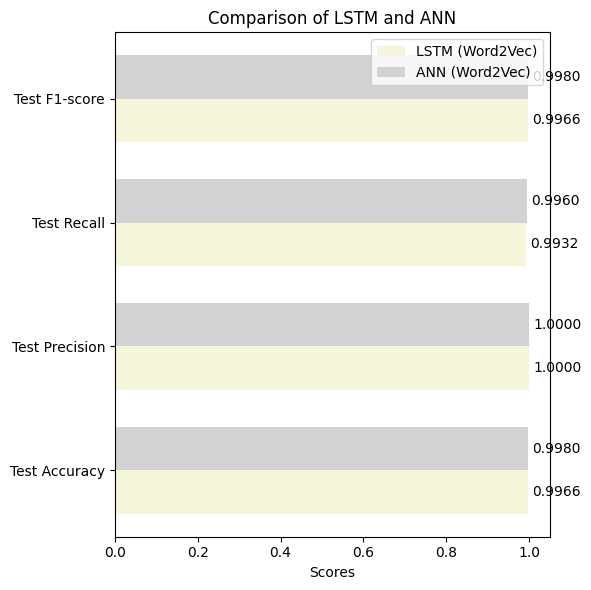

In [ ]:
lstm_metrics = [0.9966, 1.0000, 0.9932, 0.9966]
ann_metrics = [0.9980, 1.0000, 0.9960, 0.9980]
labels = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(6, 6))
rects1 = ax.barh(x - width/2, lstm_metrics, width, label='LSTM (Word2Vec)', color='beige')
rects2 = ax.barh(x + width/2, ann_metrics, width, label='ANN (Word2Vec)', color='lightgrey')
ax.set_xlabel('Scores')
ax.set_title('Comparison of LSTM and ANN')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{:.4f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),
                    textcoords="offset points",
                    ha='left', va='center')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()


Both models achieved high performance in sentiment analysis, with near-perfect accuracy. The ANN model slightly outperformed the LSTM model in terms of accuracy, recall, and F1-score. The LSTM model excels in capturing temporal dependencies due to the Dropout layer, making it more robust and generalizable. In this specific case, the ANN model performed better due to its simplicity and faster training. Overall, for quick and simple deployment, the ANN model is preferred. For tasks requiring deeper understanding of sequential data, the LSTM model is more suitable.